# 📊 Review Analysis: EDA & Visualization
### MHARD Dataset - Rating-based Keyword Analysis

---

**Objectives:**
1. Exploratory Data Analysis (EDA) of review data
2. Extract and analyze keywords by rating
3. Visualize with Word Clouds, Bar Charts, and Heatmaps
4. Derive insights

In [9]:
import sys
print(sys.executable)

/Users/hunjunsin/Desktop/Jun/hcai/FinalProject/reflecta/review-scraping/venv/bin/python


## 📦 1. Setup & Import Libraries

In [36]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text processing
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📂 2. Load Data

In [37]:
# Load dataset
csv_path = '../data/MHARD_dataset.csv'
df = pd.read_csv(csv_path)

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

✅ Dataset loaded successfully!
Shape: (200972, 16)
Rows: 200,972 | Columns: 16


## 🔍 3. Basic Data Exploration

In [38]:
# Display first few rows
print("\n📋 First 5 rows:")
df.head()


📋 First 5 rows:


,UID,app_name,rating,date,review,review_cleaned,likes,response_date,response,pred_gpt3.5instruct,pred_gpt3.5turbo,pred_gpt4,pred_gemini1.5flash,pred_gemini1.5pro,pred_llama3.1_8b,pred_llama3.3_70b
0,1,chiku,5,"August 17, 2020",I'm digging it. journaling everything I do dur...,im digging journaling everything day complaint...,30,"August 23, 2020",We have fixed the issue in our latest update (...,4.0,4.0,4.0,4.0,4.0,4.0,4.0
1,2,chiku,4,"December 22, 2020","I really like this app, however, the awesome s...",really like app however awesome smiley graphic...,18,"December 22, 2020",Thank you so much for taking out time to write...,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,chiku,5,"March 02, 2022","I love this. It's so calming, and relaxing, an...",love calming relaxing definitely one favorite ...,62,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,chiku,4,"April 27, 2023",This app is really great! Its has many feature...,app really great many feature thing apps pay p...,56,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,chiku,4,"April 10, 2023",This app used to be amazing but now whenever I...,app used amazing whenever try make story start...,59,"April 13, 2023",We are really sorry for the inconvenience. We ...,2.0,2.0,2.0,2.0,3.0,3.0,2.0


In [39]:
# Column information
print("\n📊 Column Information:")
df.info()


📊 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200972 entries, 0 to 200971
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   UID                  200972 non-null  int64  
 1   app_name             200972 non-null  object 
 2   rating               200972 non-null  int64  
 3   date                 200972 non-null  object 
 4   review               200951 non-null  object 
 5   review_cleaned       200732 non-null  object 
 6   likes                200972 non-null  int64  
 7   response_date        52363 non-null   object 
 8   response             52363 non-null   object 
 9   pred_gpt3.5instruct  200667 non-null  float64
 10  pred_gpt3.5turbo     200781 non-null  float64
 11  pred_gpt4            200471 non-null  float64
 12  pred_gemini1.5flash  198569 non-null  float64
 13  pred_gemini1.5pro    200918 non-null  float64
 14  pred_llama3.1_8b     190543 non-null  float64

In [40]:
# Basic statistics
print("\n📈 Descriptive Statistics:")
df.describe()


📈 Descriptive Statistics:


,UID,rating,likes,pred_gpt3.5instruct,pred_gpt3.5turbo,pred_gpt4,pred_gemini1.5flash,pred_gemini1.5pro,pred_llama3.1_8b,pred_llama3.3_70b
count,200972.000000,200972.000000,200972.000000,200667.000000,200781.000000,200471.000000,198569.000000,200918.000000,190543.000000,200087.000000
mean,100486.500000,3.943042,4.436011,3.819656,3.848203,3.883584,3.599635,3.831394,4.240219,3.814911
std,58015.763487,1.543263,27.654612,1.471141,1.425529,1.519034,1.508929,1.525243,1.051020,1.575484
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50243.750000,3.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
50%,100486.500000,5.000000,0.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000
75%,150729.250000,5.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,200972.000000,5.000000,2413.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



❓ Missing Values:
                     Missing Count  Percentage
response_date               148609   73.945127
response                    148609   73.945127
pred_llama3.1_8b             10429    5.189280
pred_gemini1.5flash           2403    1.195689
pred_llama3.3_70b              885    0.440360
pred_gpt4                      501    0.249288
pred_gpt3.5instruct            305    0.151762
review_cleaned                 240    0.119420
pred_gpt3.5turbo               191    0.095038
pred_gemini1.5pro               54    0.026869
review                          21    0.010449


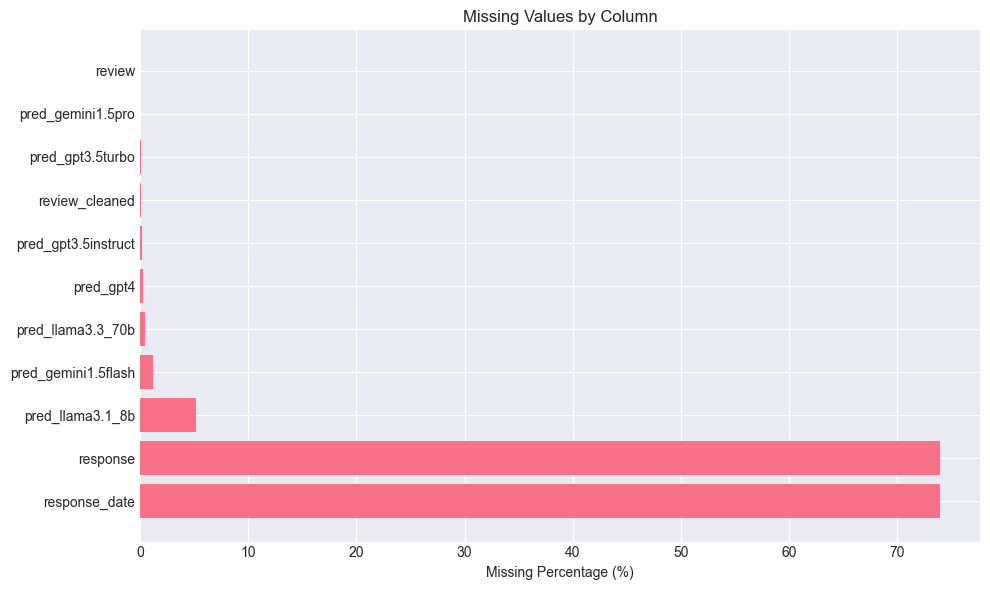

In [41]:
# Missing values analysis
print("\n❓ Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
if missing_df['Missing Count'].sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]
    plt.barh(missing_df_filtered.index, missing_df_filtered['Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found!")

## ⭐ 4. Rating Distribution Analysis

In [42]:
# Check if rating column exists
rating_col = None
for col in ['rating', 'Rating', 'score', 'Score', 'star', 'stars']:
    if col in df.columns:
        rating_col = col
        break

if rating_col:
    print(f"✅ Rating column found: '{rating_col}'")
    
    # Rating statistics
    print(f"\n⭐ Rating Statistics:")
    print(df[rating_col].describe())
    print(f"\nUnique ratings: {sorted(df[rating_col].unique())}")
else:
    print("⚠️ Rating column not found. Please check column names.")
    print("Available columns:", df.columns.tolist())

✅ Rating column found: 'rating'

⭐ Rating Statistics:
count    200972.000000
mean          3.943042
std           1.543263
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Unique ratings: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]



📊 Rating Distribution:
  1⭐:   34,582 reviews (17.21%)
  2⭐:    8,923 reviews ( 4.44%)
  3⭐:   11,111 reviews ( 5.53%)
  4⭐:   25,100 reviews (12.49%)
  5⭐:  121,256 reviews (60.33%)


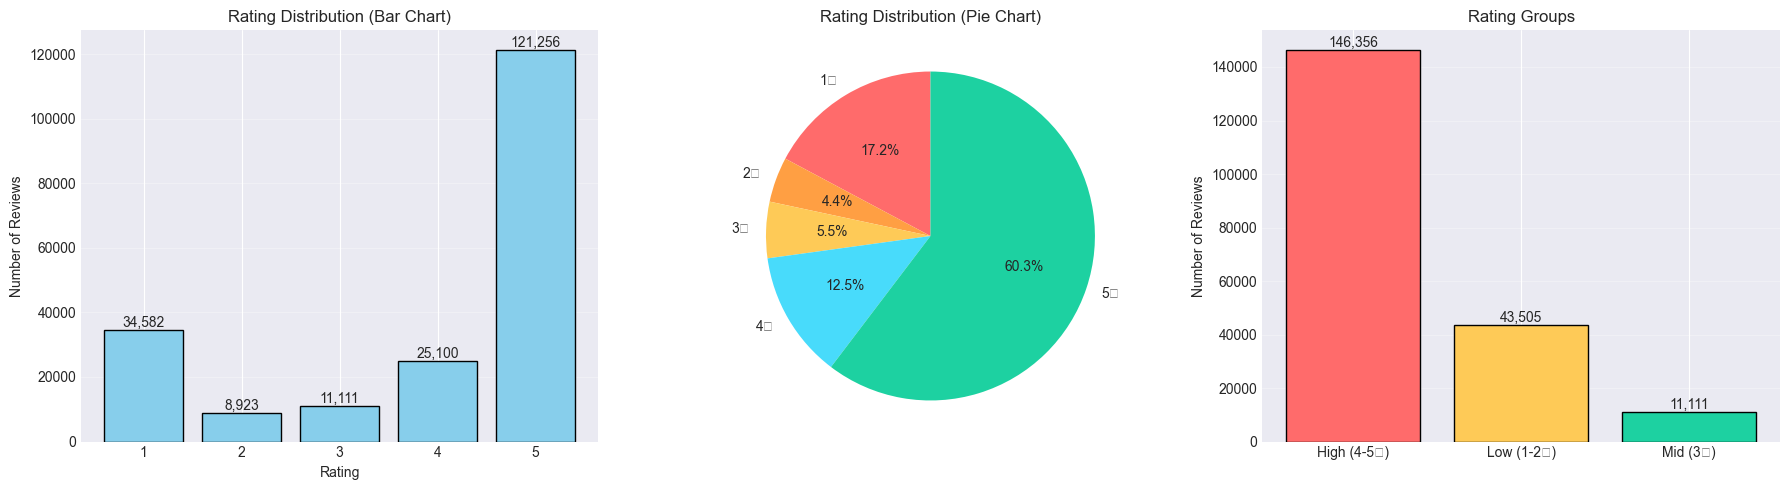


📊 Rating Groups:
  High (4-5⭐):  146,356 reviews (72.82%)
  Low (1-2⭐):   43,505 reviews (21.65%)
  Mid (3⭐):   11,111 reviews ( 5.53%)


In [43]:
# Rating distribution
if rating_col:
    rating_counts = df[rating_col].value_counts().sort_index()
    
    print("\n📊 Rating Distribution:")
    for rating, count in rating_counts.items():
        pct = (count / len(df)) * 100
        print(f"  {rating}⭐: {count:>8,} reviews ({pct:>5.2f}%)")
    
    # Visualizations
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Bar chart
    axes[0].bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Rating')
    axes[0].set_ylabel('Number of Reviews')
    axes[0].set_title('Rating Distribution (Bar Chart)')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add counts on bars
    for i, (rating, count) in enumerate(rating_counts.items()):
        axes[0].text(rating, count, f'{count:,}', ha='center', va='bottom')
    
    # Pie chart
    colors = ['#ff6b6b', '#ff9f43', '#feca57', '#48dbfb', '#1dd1a1']
    axes[1].pie(rating_counts.values, labels=[f'{r}⭐' for r in rating_counts.index],
                autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1].set_title('Rating Distribution (Pie Chart)')
    
    # Rating groups
    df['rating_group'] = pd.cut(df[rating_col], bins=[0, 2, 3, 5], 
                                  labels=['Low (1-2⭐)', 'Mid (3⭐)', 'High (4-5⭐)'])
    group_counts = df['rating_group'].value_counts()
    
    axes[2].bar(range(len(group_counts)), group_counts.values, 
                color=['#ff6b6b', '#feca57', '#1dd1a1'], edgecolor='black')
    axes[2].set_xticks(range(len(group_counts)))
    axes[2].set_xticklabels(group_counts.index, rotation=0)
    axes[2].set_ylabel('Number of Reviews')
    axes[2].set_title('Rating Groups')
    axes[2].grid(axis='y', alpha=0.3)
    
    # Add counts on bars
    for i, count in enumerate(group_counts.values):
        axes[2].text(i, count, f'{count:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Rating Groups:")
    for group, count in group_counts.items():
        pct = (count / len(df)) * 100
        print(f"  {group}: {count:>8,} reviews ({pct:>5.2f}%)")

## 📝 5. Review Text Analysis

In [44]:
# Find review text column
review_col = None
for col in ['review', 'Review', 'review_cleaned', 'text', 'Text', 'content', 'review_text']:
    if col in df.columns:
        review_col = col
        break

if review_col:
    print(f"✅ Review column found: '{review_col}'")
    
    # Calculate text statistics
    df['review_length'] = df[review_col].fillna('').astype(str).apply(len)
    df['word_count'] = df[review_col].fillna('').astype(str).apply(lambda x: len(x.split()))
    
    print(f"\n📝 Review Text Statistics:")
    print(f"  Average length: {df['review_length'].mean():.1f} characters")
    print(f"  Average words: {df['word_count'].mean():.1f} words")
    print(f"  Median length: {df['review_length'].median():.1f} characters")
    print(f"  Median words: {df['word_count'].median():.1f} words")
    print(f"  Max length: {df['review_length'].max():,} characters")
    print(f"  Max words: {df['word_count'].max():,} words")
else:
    print("⚠️ Review column not found. Please check column names.")
    print("Available columns:", df.columns.tolist())

✅ Review column found: 'review'

📝 Review Text Statistics:
  Average length: 165.1 characters
  Average words: 31.2 words
  Median length: 123.0 characters
  Median words: 23.0 words
  Max length: 3,649 characters
  Max words: 674 words


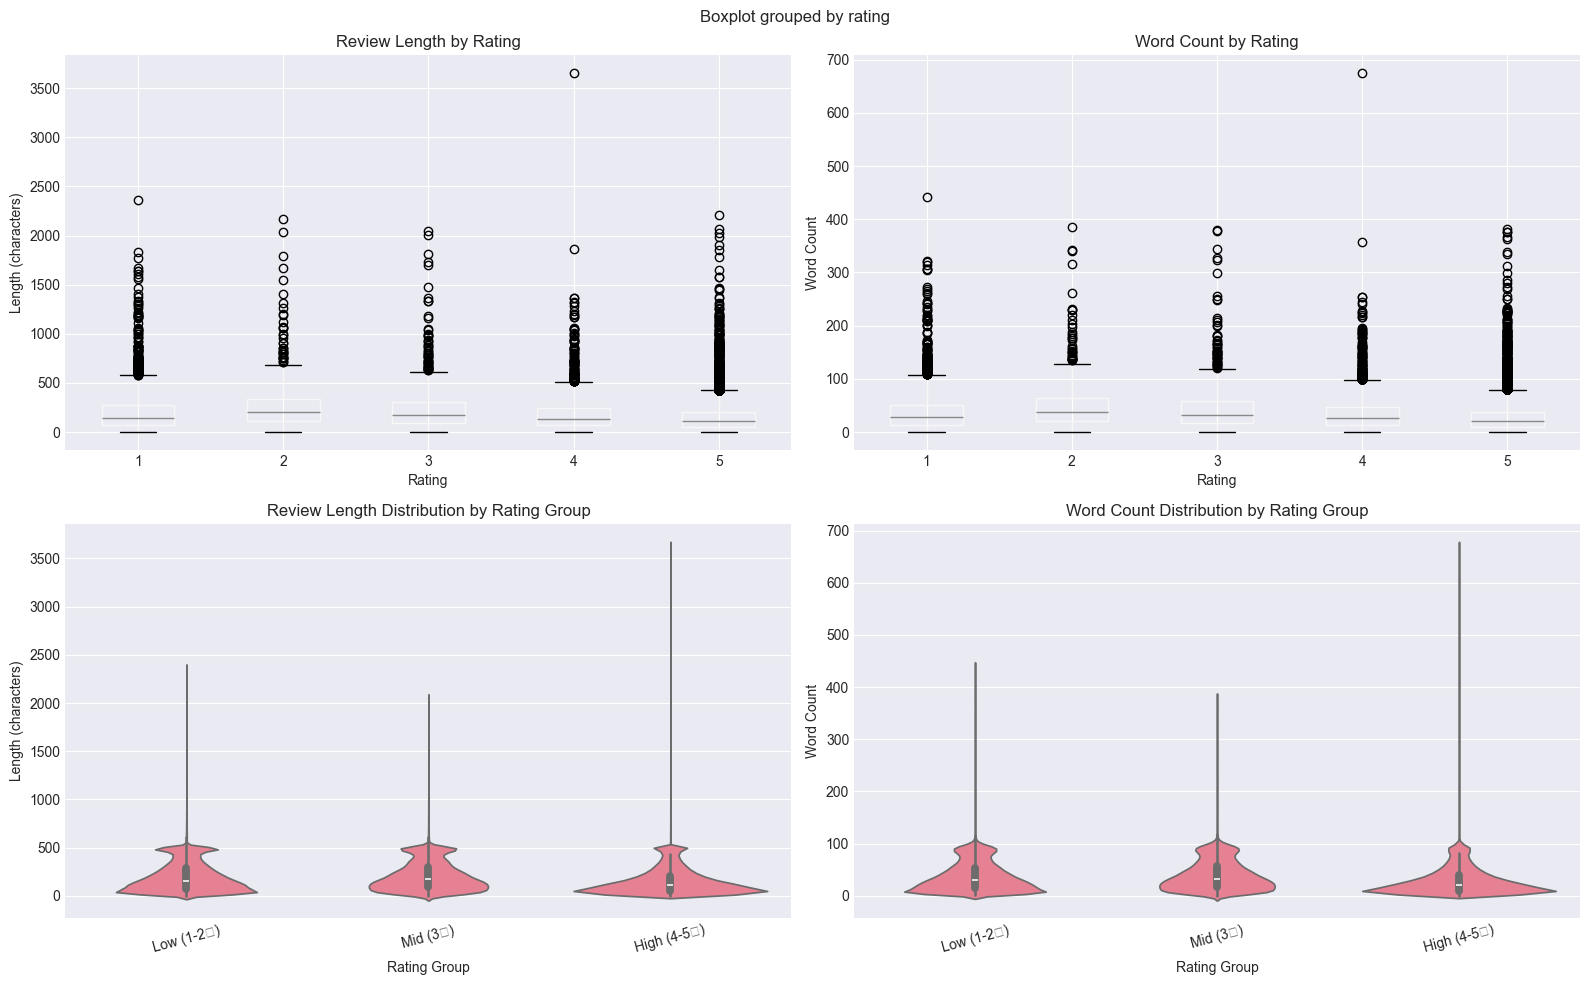


📊 Review Length Statistics by Rating Group:
             review_length                                                 \
                     count   mean    std  min   25%    50%    75%     max   
rating_group                                                                
Low (1-2⭐)         43505.0  197.7  153.3  2.0  76.0  157.0  288.0  2365.0   
Mid (3⭐)           11111.0  210.3  154.1  0.0  91.0  172.0  304.0  2044.0   
High (4-5⭐)       146356.0  152.0  130.3  0.0  55.0  112.0  208.0  3649.0   

             word_count                                            
                  count  mean   std  min   25%   50%   75%    max  
rating_group                                                       
Low (1-2⭐)      43505.0  37.1  28.6  1.0  14.0  30.0  54.0  441.0  
Mid (3⭐)        11111.0  40.0  29.1  0.0  17.0  33.0  58.0  379.0  
High (4-5⭐)    146356.0  28.7  24.5  0.0  10.0  21.0  39.0  674.0  


In [45]:
# Review length by rating group
if review_col and rating_col:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Box plot - Review length by rating
    df.boxplot(column='review_length', by=rating_col, ax=axes[0, 0])
    axes[0, 0].set_title('Review Length by Rating')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Length (characters)')
    plt.sca(axes[0, 0])
    plt.xticks(rotation=0)
    
    # Box plot - Word count by rating
    df.boxplot(column='word_count', by=rating_col, ax=axes[0, 1])
    axes[0, 1].set_title('Word Count by Rating')
    axes[0, 1].set_xlabel('Rating')
    axes[0, 1].set_ylabel('Word Count')
    plt.sca(axes[0, 1])
    plt.xticks(rotation=0)
    
    # Violin plot - Review length by rating group
    sns.violinplot(data=df, x='rating_group', y='review_length', ax=axes[1, 0])
    axes[1, 0].set_title('Review Length Distribution by Rating Group')
    axes[1, 0].set_xlabel('Rating Group')
    axes[1, 0].set_ylabel('Length (characters)')
    axes[1, 0].tick_params(axis='x', rotation=15)
    
    # Violin plot - Word count by rating group
    sns.violinplot(data=df, x='rating_group', y='word_count', ax=axes[1, 1])
    axes[1, 1].set_title('Word Count Distribution by Rating Group')
    axes[1, 1].set_xlabel('Rating Group')
    axes[1, 1].set_ylabel('Word Count')
    axes[1, 1].tick_params(axis='x', rotation=15)
    
    plt.tight_layout()
    plt.show()
    
    # Statistics by rating group
    print("\n📊 Review Length Statistics by Rating Group:")
    print(df.groupby('rating_group')[['review_length', 'word_count']].describe().round(1))

## 🔑 6. Keyword Extraction & Analysis

In [46]:
# Helper function for text preprocessing with lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download required NLTK data (run once)
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    print("Downloading NLTK data...")
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("✅ NLTK data downloaded")

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Clean and preprocess text with lemmatization"""
    if pd.isna(text):
        return ''
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Lemmatize each word
    words = text.split()
    lemmatized_words = []
    for word in words:
        # Try as verb first, then noun, then adjective
        lemma = lemmatizer.lemmatize(word, pos='v')
        if lemma == word:
            lemma = lemmatizer.lemmatize(word, pos='n')
        if lemma == word:
            lemma = lemmatizer.lemmatize(word, pos='a')
        lemmatized_words.append(lemma)
    
    return ' '.join(lemmatized_words).strip()

# Apply preprocessing
if review_col:
    print("🔄 Applying text preprocessing with lemmatization...")
    df['review_processed'] = df[review_col].apply(preprocess_text)
    print("✅ Text preprocessing completed!")
    
    # Show example
    print("\n📝 Example transformation:")
    sample_idx = df[df[review_col].notna()].index[0]
    print(f"Original: {df[review_col].iloc[sample_idx][:100]}...")
    print(f"Processed: {df['review_processed'].iloc[sample_idx][:100]}...")

✅ NLTK data downloaded
🔄 Applying text preprocessing with lemmatization...
✅ Text preprocessing completed!

📝 Example transformation:
Original: I'm digging it. journaling everything I do during the day. my only complaint is sometimes when editi...
Processed: i m dig it journaling everything i do during the day my only complaint be sometimes when edit it s h...


In [47]:
# Extract keywords by rating group using TF-IDF - IMPROVED VERSION
def extract_keywords_tfidf(text_series, top_n=30):
    """Extract top keywords using TF-IDF"""
    # Convert to list of documents (each review is a document)
    documents = text_series.fillna('').astype(str).tolist()
    
    # Filter out empty documents
    documents = [doc for doc in documents if doc.strip()]
    
    if not documents:
        print("  ⚠️ No valid documents found")
        return {}
    
    print(f"  📄 Processing {len(documents)} documents")
    
    try:
        # Custom stopwords - add common but meaningless words
        custom_stopwords = [
            'app', 'apps', 'just', 'like', 'really', 'use', 'using', 'used',
            'good', 'great', 'bad', 'lot', 'get', 'got', 'way', 'thing', 'things',
            'make', 'makes', 'making', 'made', 'want', 'wanted', 'need', 'needed',
            'know', 'think', 'thought', 'feel', 'felt', 'try', 'tried', 'trying',
            've', 'll', 'don', 't', 's', 'm', 're', 'doesn', 'didn', 'wasn', 'weren',
            'won', 'can', 'could', 'would', 'should', 'will', 'might', 'may',
            'one', 'two', 'three', 'time', 'times', 'day', 'days', 'week', 'weeks',
            'year', 'years', 'month', 'months', 'bit', 'little', 'far', 'pretty',
            'quite', 'actually', 'still', 'even', 'well', 'go', 'going', 'went'
        ]
        
        # Combine with sklearn's english stopwords
        from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
        all_stopwords = list(ENGLISH_STOP_WORDS) + custom_stopwords
        
        # Dynamic min_df
        min_docs = max(1, min(2, len(documents) // 1000))
        
        vectorizer = TfidfVectorizer(
            max_features=200,
            stop_words=all_stopwords,
            ngram_range=(1, 2),  # unigrams and bigrams
            min_df=min_docs,
            max_df=0.9
        )
        
        tfidf_matrix = vectorizer.fit_transform(documents)
        feature_names = vectorizer.get_feature_names_out()
        
        print(f"  ✓ Found {len(feature_names)} features")
        
        # Sum scores across documents
        scores = tfidf_matrix.sum(axis=0).A1
        
        # Get top keywords
        top_indices = scores.argsort()[-top_n:][::-1]
        keywords = {feature_names[i]: scores[i] for i in top_indices}
        
        return keywords
    except Exception as e:
        print(f"  ❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return {}

# Extract keywords for each rating group
if review_col and rating_col:
    print("🔍 Extracting keywords by rating group...\n")
    
    keywords_by_group = {}
    
    for group in ['Low (1-2⭐)', 'Mid (3⭐)', 'High (4-5⭐)']:
        print(f"\n{'='*60}")
        print(f"Processing {group}")
        print(f"{'='*60}")
        
        group_reviews = df[df['rating_group'] == group]['review_processed']
        keywords = extract_keywords_tfidf(group_reviews, top_n=30)
        keywords_by_group[group] = keywords
        
        print(f"\n🔑 Top 15 Keywords:")
        if keywords:
            for i, (keyword, score) in enumerate(list(keywords.items())[:15], 1):
                print(f"  {i:2d}. {keyword:30s} (score: {score:.2f})")
        else:
            print("  ⚠️ No keywords extracted")
    
    print("\n✅ Keyword extraction completed!")

🔍 Extracting keywords by rating group...


Processing Low (1-2⭐)
  📄 Processing 43501 documents
  ✓ Found 200 features

🔑 Top 15 Keywords:
   1. pay                            (score: 2277.83)
   2. free                           (score: 2086.10)
   3. phone                          (score: 1801.25)
   4. work                           (score: 1570.31)
   5. help                           (score: 1388.41)
   6. subscription                   (score: 1369.28)
   7. money                          (score: 1229.62)
   8. say                            (score: 1129.60)
   9. uninstall                      (score: 1071.88)
  10. trial                          (score: 1064.65)
  11. charge                         (score: 1040.04)
  12. download                       (score: 1018.54)
  13. people                         (score: 999.06)
  14. cancel                         (score: 989.91)
  15. update                         (score: 976.75)

Processing Mid (3⭐)
  📄 Processing 11108 documents
  

## 🔍 6.1. Negation Analysis

Analyze keywords that appear with negation words to understand their true meaning.

In [48]:
# Analyze keywords with negation context
import re

def analyze_keyword_with_negation(keyword, text_series, group_name):
    """Analyze how often a keyword appears with negation"""
    
    # Negation patterns
    negation_patterns = [
        r'\b(not|no|never|nothing|nobody|nowhere|neither|nor|none)\s+\w*\s*' + keyword,
        r'\b(don\'t|doesn\'t|didn\'t|won\'t|wouldn\'t|can\'t|couldn\'t|shouldn\'t|isn\'t|aren\'t|wasn\'t|weren\'t)\s+\w*\s*' + keyword,
        r'\b(dont|doesnt|didnt|wont|wouldnt|cant|couldnt|shouldnt|isnt|arent|wasnt|werent)\s+\w*\s*' + keyword,
    ]
    
    positive_count = 0
    negative_count = 0
    positive_examples = []
    negative_examples = []
    
    for text in text_series:
        if pd.isna(text):
            continue
        text = str(text).lower()
        
        # Check if keyword exists in text
        if keyword in text:
            # Check for negation
            is_negated = False
            for pattern in negation_patterns:
                if re.search(pattern, text):
                    is_negated = True
                    if len(negative_examples) < 3:
                        # Extract sentence around the keyword
                        sentences = text.split('.')
                        for sent in sentences:
                            if keyword in sent and re.search(pattern, sent):
                                negative_examples.append(sent.strip()[:100])
                                break
                    break
            
            if is_negated:
                negative_count += 1
            else:
                positive_count += 1
                if len(positive_examples) < 3:
                    sentences = text.split('.')
                    for sent in sentences:
                        if keyword in sent:
                            positive_examples.append(sent.strip()[:100])
                            break
    
    return {
        'keyword': keyword,
        'group': group_name,
        'positive_count': positive_count,
        'negative_count': negative_count,
        'total': positive_count + negative_count,
        'negative_ratio': negative_count / (positive_count + negative_count) if (positive_count + negative_count) > 0 else 0,
        'positive_examples': positive_examples,
        'negative_examples': negative_examples
    }

# Analyze top keywords from each group with negation
if review_col and rating_col and keywords_by_group:
    print("🔍 Analyzing keywords with negation context...\n")
    
    negation_analysis = []
    
    for group in ['Low (1-2⭐)', 'Mid (3⭐)', 'High (4-5⭐)']:
        group_keywords = list(keywords_by_group[group].keys())[:10]  # Top 10 keywords
        group_reviews = df[df['rating_group'] == group]['review_processed']
        
        print(f"\n{'='*70}")
        print(f"📊 {group} - Negation Analysis")
        print(f"{'='*70}")
        
        for keyword in group_keywords:
            result = analyze_keyword_with_negation(keyword, group_reviews, group)
            negation_analysis.append(result)
            
            if result['total'] > 0:
                print(f"\n🔑 '{keyword}':")
                print(f"   Positive mentions: {result['positive_count']:>5} ({(1-result['negative_ratio'])*100:>5.1f}%)")
                print(f"   Negative mentions: {result['negative_count']:>5} ({result['negative_ratio']*100:>5.1f}%)")
                
                if result['negative_count'] > 0 and result['negative_examples']:
                    print(f"   ⚠️ Negative examples:")
                    for ex in result['negative_examples'][:2]:
                        print(f"      - {ex}")
    
    print("\n\n" + "="*70)
    print("📊 Summary: Keywords with High Negation Rates")
    print("="*70)
    
    # Create DataFrame for analysis
    neg_df = pd.DataFrame(negation_analysis)
    neg_df = neg_df[neg_df['total'] > 10]  # Filter keywords with at least 10 mentions
    neg_df = neg_df.sort_values('negative_ratio', ascending=False)
    
    print("\nTop keywords with highest negation rates:")
    for idx, row in neg_df.head(10).iterrows():
        print(f"{row['keyword']:20} ({row['group']:15}): {row['negative_ratio']*100:>5.1f}% negative ({row['negative_count']}/{row['total']})")
    
    print("\n✅ Negation analysis completed!")

🔍 Analyzing keywords with negation context...


📊 Low (1-2⭐) - Negation Analysis

🔑 'pay':
   Positive mentions:  8419 ( 95.2%)
   Negative mentions:   424 (  4.8%)
   ⚠️ Negative examples:
      - i m not pay for this if i want to pay for something for my mental heath i d buy something meaningful
      - i know the main job for a company be make money but ask people money when they have health issue and

🔑 'free':
   Positive mentions:  6697 ( 89.6%)
   Negative mentions:   774 ( 10.4%)
   ⚠️ Negative examples:
      - you can t access the free learn path now you click on the unlock one and it prompt you to sign up fo
      - it would be great if you don t ask every second to get the premium no free for this app only the fir

🔑 'phone':
   Positive mentions:  4264 ( 98.8%)
   Negative mentions:    53 (  1.2%)
   ⚠️ Negative examples:
      - free version great day before pay the for annual start get error report issue no response now i ve b
      - i would like to try this app a littl

## 🔍 6.2. Keyword Context Analysis

Check how each keyword is actually used through examples.

In [49]:
# Interactive keyword explorer
def explore_keyword(keyword, rating_group=None, show_negated=False, num_examples=10):
    """
    Explore how a keyword is used in reviews
    
    Parameters:
    - keyword: the keyword to explore
    - rating_group: 'Low (1-2⭐)', 'Mid (3⭐)', 'High (4-5⭐)', or None for all
    - show_negated: if True, show only negated occurrences
    - num_examples: number of examples to show
    """
    
    # Filter by rating group if specified
    if rating_group:
        filtered_df = df[df['rating_group'] == rating_group]
    else:
        filtered_df = df
    
    # Find reviews containing the keyword
    mask = filtered_df['review_processed'].str.contains(keyword, na=False)
    matching_reviews = filtered_df[mask]
    
    print(f"\n{'='*70}")
    print(f"🔍 Exploring keyword: '{keyword}'")
    if rating_group:
        print(f"📊 Rating group: {rating_group}")
    print(f"{'='*70}")
    print(f"\nFound {len(matching_reviews)} reviews containing '{keyword}'")
    
    if len(matching_reviews) == 0:
        return
    
    # Check for negation
    negation_words = ['not', 'no', 'never', 'dont', 'doesnt', 'didnt', 'wont', 'wouldnt', 
                      'cant', 'couldnt', 'shouldnt', 'isnt', 'arent', 'wasnt', 'werent']
    
    negated_reviews = []
    positive_reviews = []
    
    for idx, row in matching_reviews.iterrows():
        text = str(row['review_processed']).lower()
        # Extract sentences containing the keyword
        sentences = text.split('.')
        for sent in sentences:
            if keyword in sent:
                # Check if sentence contains negation
                is_negated = any(neg_word in sent.split() for neg_word in negation_words)
                
                example = {
                    'rating': row[rating_col],
                    'sentence': sent.strip(),
                    'full_review': row['review'][:200] if pd.notna(row['review']) else ''
                }
                
                if is_negated:
                    negated_reviews.append(example)
                else:
                    positive_reviews.append(example)
                break
    
    print(f"\n📈 Statistics:")
    print(f"  Positive mentions: {len(positive_reviews)} ({len(positive_reviews)/len(matching_reviews)*100:.1f}%)")
    print(f"  Negative mentions: {len(negated_reviews)} ({len(negated_reviews)/len(matching_reviews)*100:.1f}%)")
    
    if show_negated and negated_reviews:
        print(f"\n⚠️ Negated Examples (showing {min(num_examples, len(negated_reviews))}):")
        for i, ex in enumerate(negated_reviews[:num_examples], 1):
            print(f"\n  {i}. Rating: {ex['rating']}⭐")
            print(f"     Sentence: {ex['sentence'][:150]}")
            print(f"     Context: {ex['full_review'][:150]}...")
    else:
        print(f"\n✅ Positive Examples (showing {min(num_examples, len(positive_reviews))}):")
        for i, ex in enumerate(positive_reviews[:num_examples], 1):
            print(f"\n  {i}. Rating: {ex['rating']}⭐")
            print(f"     Sentence: {ex['sentence'][:150]}")
            print(f"     Context: {ex['full_review'][:150]}...")

# Example usage - explore specific keywords
print("="*70)
print("🔍 KEYWORD EXPLORATION EXAMPLES")
print("="*70)

# Explore 'help' in different rating groups
for group in ['Low (1-2⭐)', 'High (4-5⭐)']:
    explore_keyword('help', rating_group=group, show_negated=False, num_examples=5)

print("\n\n" + "="*70)
print("⚠️ NEGATED USAGE OF 'help' IN LOW RATINGS")
print("="*70)
explore_keyword('help', rating_group='Low (1-2⭐)', show_negated=True, num_examples=5)

🔍 KEYWORD EXPLORATION EXAMPLES

🔍 Exploring keyword: 'help'
📊 Rating group: Low (1-2⭐)

Found 5281 reviews containing 'help'

📈 Statistics:
  Positive mentions: 2128 (40.3%)
  Negative mentions: 3153 (59.7%)

✅ Positive Examples (showing 5):

  1. Rating: 2⭐
     Sentence: i have low self esteem and be ashamed of many aspect of myself include my financial status i try the learn path about self esteem and their test confi
     Context: I have low self-esteem and am ashamed of many aspects of myself including my financial status. I tried the learning path about self-esteem and their t...

  2. Rating: 1⭐
     Sentence: the app content be great in fact so great it do help change my mental state but the fact i cannot revisit the old session make this the most frustrate
     Context: The app content is great. In fact so great it did help changed my mental state. But the fact I cannot revisit the old sessions makes this the most fru...

  3. Rating: 1⭐
     Sentence: i start the procrastinat

## ☁️ 7. Word Cloud Visualization

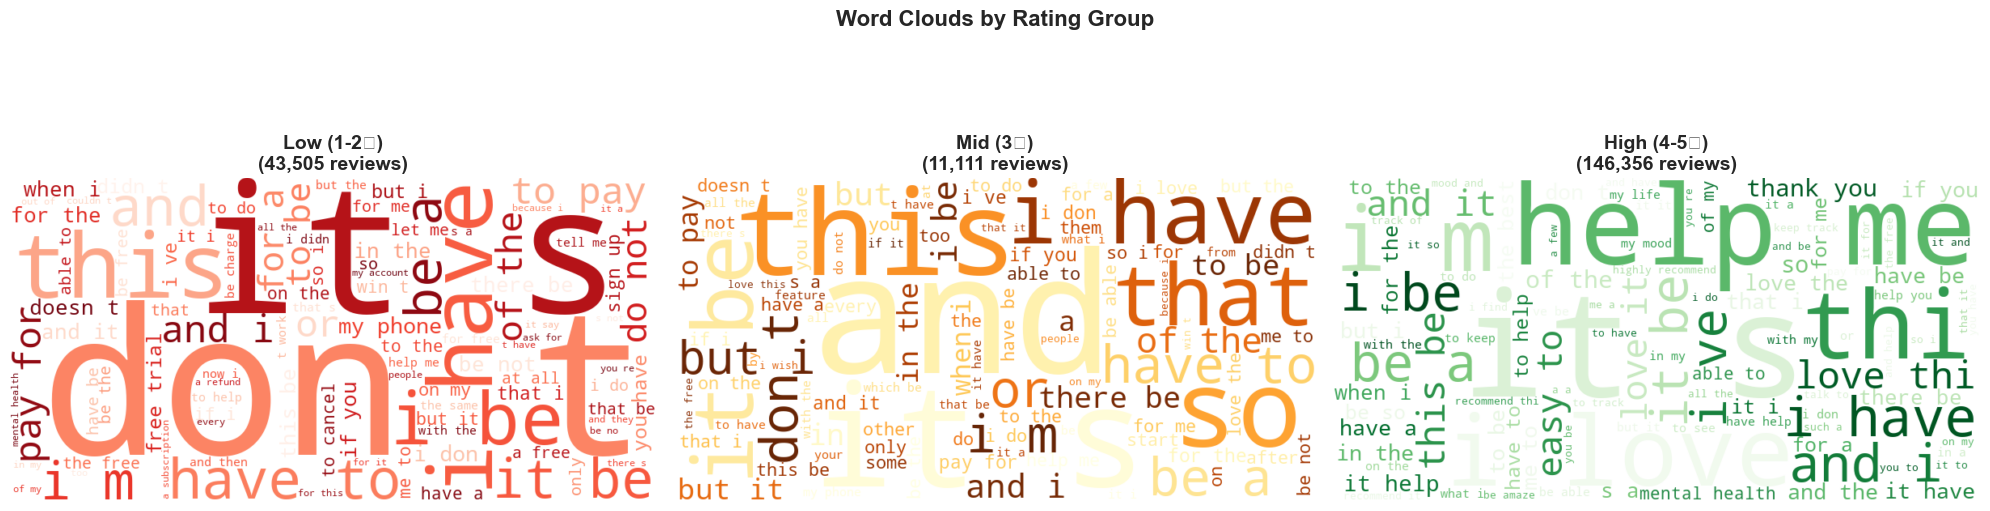


✅ Word clouds generated with improved preprocessing!


In [50]:
# Generate word clouds for each rating group with improved preprocessing
if review_col and rating_col:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    groups = ['Low (1-2⭐)', 'Mid (3⭐)', 'High (4-5⭐)']
    colors = ['Reds', 'YlOrBr', 'Greens']
    
    # Extended stopwords for better word cloud
    extended_stopwords = set([
        'app', 'apps', 'just', 'like', 'really', 'use', 'using', 'used',
        'good', 'great', 'bad', 'lot', 'get', 'got', 'way', 'thing', 'things',
        'make', 'makes', 'making', 'made', 'want', 'wanted', 'need', 'needed',
        'know', 'think', 'thought', 'feel', 'felt', 'try', 'tried', 'trying',
        'one', 'two', 'three', 'time', 'day', 'week', 'month', 'year',
        'bit', 'little', 'far', 'pretty', 'quite', 'actually', 'still', 
        'even', 'well', 'go', 'going', 'went', 'new', 'would', 'could',
        'will', 'can', 'much', 'many', 'also', 'very', 'more', 'most'
    ])
    
    for idx, (group, cmap) in enumerate(zip(groups, colors)):
        # Get text for this group
        text = ' '.join(df[df['rating_group'] == group]['review_processed'].fillna(''))
        
        if text.strip():
            # Generate word cloud
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                colormap=cmap,
                max_words=100,
                stopwords=extended_stopwords,
                relative_scaling=0.5,
                min_font_size=10,
                collocations=True  # Allow bigrams
            ).generate(text)
            
            # Plot
            axes[idx].imshow(wordcloud, interpolation='bilinear')
            axes[idx].axis('off')
            axes[idx].set_title(f'{group}\n({len(df[df["rating_group"] == group]):,} reviews)', 
                               fontsize=14, fontweight='bold')
        else:
            axes[idx].text(0.5, 0.5, 'No data available', 
                          ha='center', va='center', fontsize=12)
            axes[idx].axis('off')
    
    plt.suptitle('Word Clouds by Rating Group', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Word clouds generated with improved preprocessing!")